In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('measures_v2.csv')



# Select input features (include coolant)
input_features = ['i_d', 'i_q', 'motor_speed', 'u_q', 'torque', 'coolant']
target = 'stator_winding'

X = df[input_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("üå≤ Random Forest:")
print("‚úÖ R¬≤ Score:", r2_score(y_test, y_pred_rf))
print("‚úÖ RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


üå≤ Random Forest:
‚úÖ R¬≤ Score: 0.9672858114482241
‚úÖ RMSE: 5.185145796418217


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


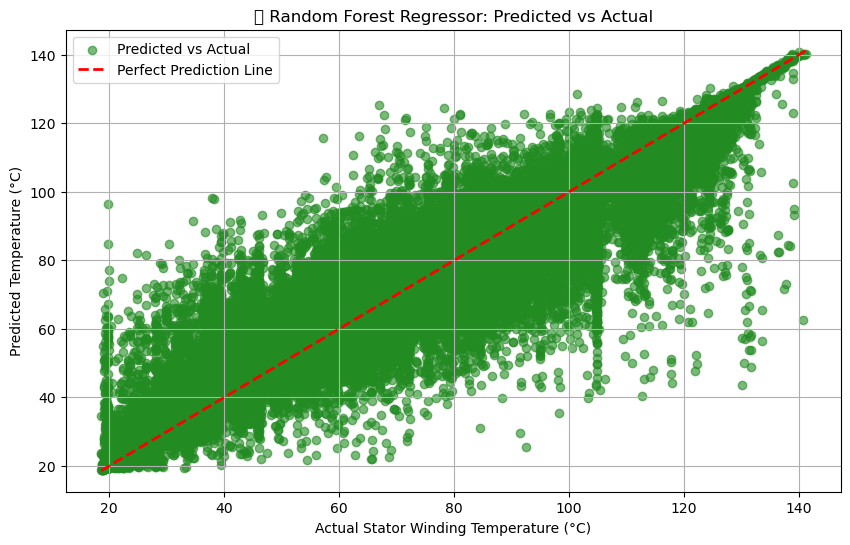

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='forestgreen', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Stator Winding Temperature (¬∞C)')
plt.ylabel('Predicted Temperature (¬∞C)')
plt.title('üå≤ Random Forest Regressor: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("üå≤ Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


/var/folders/mq/1s1c7glj4gj5nfz4xwl35rl00000gn/T/ipykernel_20609/1600397283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:

# ‚úÇÔ∏è Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ‚öñÔ∏è Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# üå≤ Import Random Forest and search tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint

# üîç Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# üå≤ Random Forest base model
base_model = RandomForestRegressor(random_state=42)

# üîß Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

# üèãÔ∏è Train the model
random_search.fit(X_train_scaled, y_train)

# üéØ Best model
best_rf_model = random_search.best_estimator_

# üìà Predict and evaluate
y_pred = best_rf_model.predict(X_test_scaled)

print("\nüå≤ Tuned Random Forest Model:")
print("‚úÖ Best Parameters:", random_search.best_params_)
print("‚úÖ R¬≤ Score:", r2_score(y_test, y_pred))
print("‚úÖ RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
